In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [10]:
confrmd_df = pd.read_csv("../data/time_series_confirmed.csv")
recovrd_df = pd.read_csv("../data/time_series_recovered.csv")
deaths_df = pd.read_csv("../data/time_series_deaths.csv")

confrmd_df.drop(["Province/State","Lat","Long"], axis=1, inplace=True)
recovrd_df.drop(["Province/State","Lat","Long"], axis=1, inplace=True)
deaths_df.drop(["Province/State","Lat","Long"], axis=1, inplace=True)

confrmd_df = confrmd_df.groupby("Country/Region").sum().reset_index()
recovrd_df = recovrd_df.groupby("Country/Region").sum().reset_index()
deaths_df = deaths_df.groupby("Country/Region").sum().reset_index()

confrmd_df = confrmd_df.melt(id_vars=["Country/Region"], var_name="timestamp", value_name="cases")
recovrd_df = recovrd_df.melt(id_vars=["Country/Region"], var_name="timestamp", value_name="cases")
deaths_df = deaths_df.melt(id_vars=["Country/Region"], var_name="timestamp", value_name="cases")

confrmd_df.rename(columns={"cases": "conf_cases"},inplace=True)
recovrd_df.rename(columns={"cases": "recov_cases"},inplace=True)
deaths_df.rename(columns={"cases": "death_cases"},inplace=True)

df = pd.concat([confrmd_df,recovrd_df.iloc[:,2],deaths_df.iloc[:,2]], axis=1)

df["timestamp"] = pd.to_datetime(df["timestamp"])


df.head()

,Country/Region,timestamp,conf_cases,recov_cases,death_cases
0,Australia,2020-01-22,0,0,0
1,Belgium,2020-01-22,0,0,0
2,Cambodia,2020-01-22,0,0,0
3,Canada,2020-01-22,0,0,0
4,Egypt,2020-01-22,0,0,0


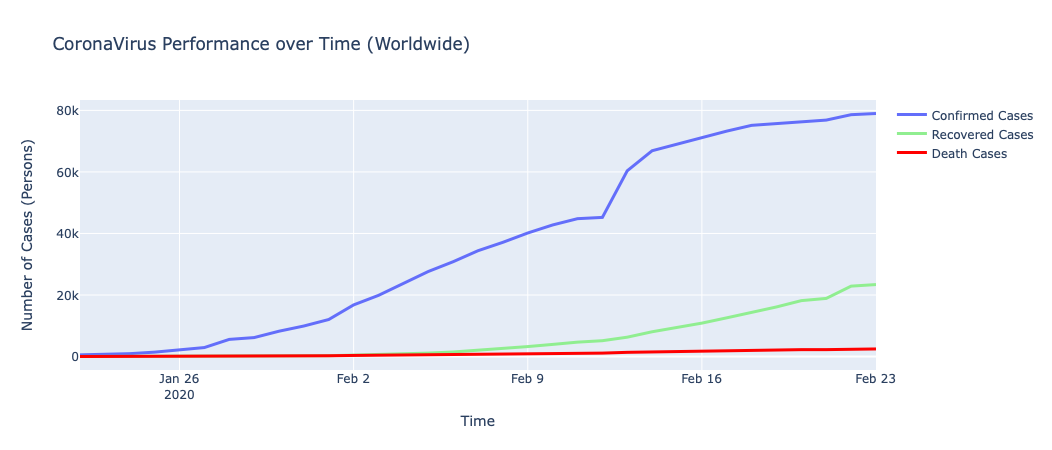

In [11]:
timestamp_grouped = df.groupby("timestamp").sum().sort_values("timestamp", ascending=True)
timestamp_grouped.reset_index(inplace=True)


fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp_grouped["timestamp"], y=timestamp_grouped["conf_cases"], name='Confirmed Cases',
                         line=dict(width=3)))
fig.add_trace(go.Scatter(x=timestamp_grouped["timestamp"], y=timestamp_grouped["recov_cases"], name='Recovered Cases',
                         line=dict(width=3),marker_color='lightgreen'))
fig.add_trace(go.Scatter(x=timestamp_grouped["timestamp"], y=timestamp_grouped["death_cases"], name='Death Cases',
                         line=dict(width=3),marker_color='red'))

fig.update_layout(title='CoronaVirus Performance over Time (Worldwide)',
                   xaxis_title='Time',
                   yaxis_title='Number of Cases (Persons)')


fig.show()

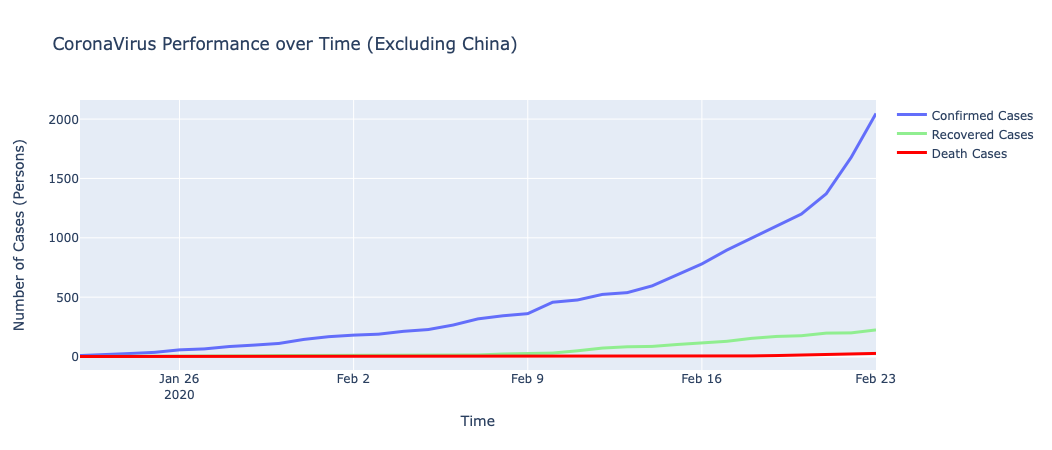

In [13]:
china = df[df["Country/Region"]=="Mainland China"].drop("Country/Region",axis=1)
timestamp_grouped_exc_china = df.drop(china.index).reset_index(drop=True)
timestamp_grouped_exc_china = timestamp_grouped_exc_china.groupby("timestamp").sum().sort_values("timestamp", ascending=True)
timestamp_grouped_exc_china.reset_index(inplace=True)


fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp_grouped_exc_china["timestamp"], y=timestamp_grouped_exc_china["conf_cases"], name='Confirmed Cases',
                         line=dict(width=3)))
fig.add_trace(go.Scatter(x=timestamp_grouped_exc_china["timestamp"], y=timestamp_grouped_exc_china["recov_cases"], name='Recovered Cases',
                         line=dict(width=3),marker_color='lightgreen'))
fig.add_trace(go.Scatter(x=timestamp_grouped_exc_china["timestamp"], y=timestamp_grouped_exc_china["death_cases"], name='Death Cases',
                         line=dict(width=3),marker_color='red'))

fig.update_layout(title='CoronaVirus Performance over Time (Excluding China)',
                   xaxis_title='Time',
                   yaxis_title='Number of Cases (Persons)')


fig.show()

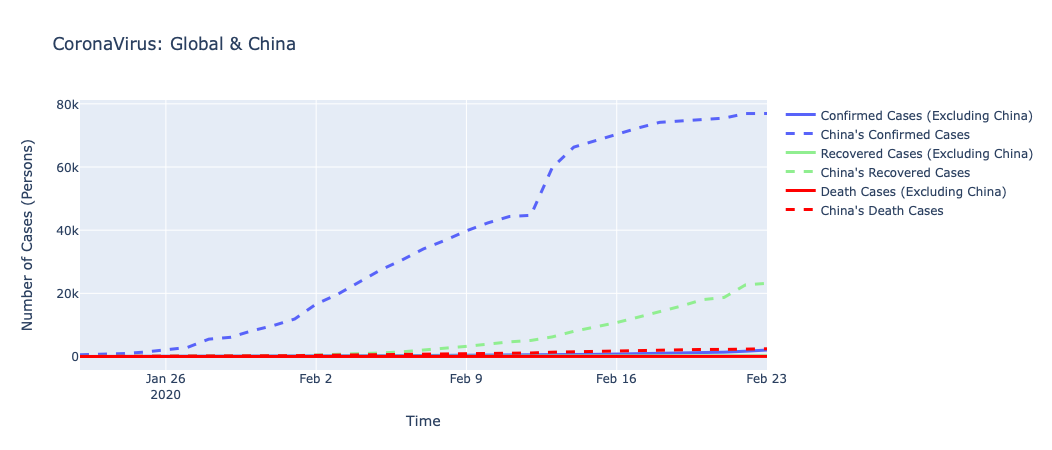

In [21]:
china = df[df["Country/Region"]=="Mainland China"].drop("Country/Region",axis=1)
china = china.groupby("timestamp").sum().sort_values("timestamp", ascending=True)
china.reset_index(inplace=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp_grouped_exc_china["timestamp"], y=timestamp_grouped_exc_china["conf_cases"], name='Confirmed Cases (Excluding China)',
                         line=dict(width=3),marker_color='#5863f9'))
fig.add_trace(go.Scatter(x=china["timestamp"], y=china["conf_cases"], name="China's Confirmed Cases",
                         line=dict(width=3, dash="dash"),marker_color='#5863f9'))

fig.add_trace(go.Scatter(x=timestamp_grouped_exc_china["timestamp"], y=timestamp_grouped_exc_china["recov_cases"], name='Recovered Cases (Excluding China)',
                         line=dict(width=3),marker_color='lightgreen'))
fig.add_trace(go.Scatter(x=china["timestamp"], y=china["recov_cases"], name="China's Recovered Cases",
                         line=dict(width=3, dash="dash"),marker_color='lightgreen'))

fig.add_trace(go.Scatter(x=timestamp_grouped_exc_china["timestamp"], y=timestamp_grouped_exc_china["death_cases"], name='Death Cases (Excluding China)',
                         line=dict(width=3),marker_color='red'))
fig.add_trace(go.Scatter(x=china["timestamp"], y=china["death_cases"], name="China's Death Cases",
                         line=dict(width=3, dash="dash"),marker_color='red'))


fig.update_layout(title='CoronaVirus: Global & China',
                   xaxis_title='Time',
                   yaxis_title='Number of Cases (Persons)')


fig.show()

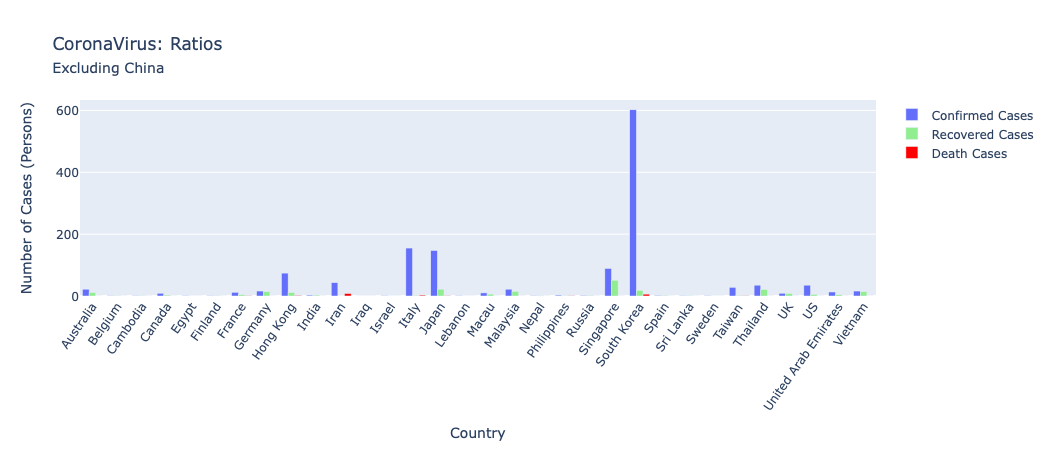

In [6]:
# latest stat of each country
countries = df["Country/Region"].unique()
country_grouped = df.groupby("Country/Region") # group by country
countries_stat = []
for country in countries:
    countries_stat.append(country_grouped.get_group(country).sort_values("timestamp", ascending=False).iloc[0]) # for each group get the latest stat

countries_stat = pd.DataFrame(countries_stat).reset_index(drop=True)
china = countries_stat[countries_stat["Country/Region"]=="Mainland China"].index
countries_stat.drop(china,axis=0,inplace=True)
other = countries_stat[countries_stat["Country/Region"]=="Others"].index
countries_stat.drop(other,axis=0,inplace=True)



fig = go.Figure()
fig.add_trace(go.Bar(
    x=countries_stat["Country/Region"],
    y=countries_stat["conf_cases"],
    name='Confirmed Cases',
   # marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=countries_stat["Country/Region"],
    y=countries_stat["recov_cases"],
    name='Recovered Cases',
    marker_color='lightgreen',


))
fig.add_trace(go.Bar(
    x=countries_stat["Country/Region"],
    y=countries_stat["death_cases"],
    name='Death Cases',
    marker_color='red',


))

fig.update_layout(title='CoronaVirus: Ratios<br><span style="font-size:80%">Excluding China</span>',
                   xaxis_title='Country',
                   yaxis_title='Number of Cases (Persons)')
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-55)
fig.show()